# Colossus cosmology demo

Welcome to the Colossus cosmology tutorial.

In [10]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Setting, changing, and adjusting cosmologies

Let's begin by importing the colossus cosmology module:

In [11]:
from colossus.cosmology import cosmology   

Let's set a cosmology. Colossus has over 20 hard-coded cosmologies. An easy way to see what the properties of a cosmology are is to print it:

In [12]:
cosmo = cosmology.setCosmology('WMAP9')
print(cosmo)

Cosmology "WMAP9", flat = True, relspecies = True, 
    Om0 = 0.2865, OL0 = 0.7134, Ob0 = 0.0463, H0 = 69.32, sigma8 = 0.8200, ns = 0.9608, 
    Tcmb0 = 2.7255, Neff = 3.0460, PL = False, PLn = 0.0000


In Colossus, cosmologies are global, meaning we can always obtain the currently set cosmology:

In [13]:
my_cosmo = cosmology.getCurrent()
print(my_cosmo.name)

WMAP9


Cosmologies are objects, meaning that we can keep multiple cosmologies around. This can be useful when switching back and forth between different cosmologies, for example:

In [14]:
cosmo2 = cosmology.setCosmology('planck15')
cosmology.setCurrent(cosmo)
print(cosmology.getCurrent().name)
cosmology.setCurrent(cosmo2)
print(cosmology.getCurrent().name)

WMAP9
planck15


Of course, you can also add a user-defined cosmology:

In [15]:
my_cosmo = {'flat': True, 'H0': 72.0, 'Om0': 0.25, 'Ob0': 0.043, 'sigma8': 0.8, 'ns': 0.97}
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
print(cosmo)

Cosmology "my_cosmo", flat = True, relspecies = True, 
    Om0 = 0.2500, OL0 = 0.7499, Ob0 = 0.0430, H0 = 72.00, sigma8 = 0.8000, ns = 0.9700, 
    Tcmb0 = 2.7255, Neff = 3.0460, PL = False, PLn = 0.0000


It's even possible to change parameters of the cosmology at runtime, but we need to alert Colossus of the change:

In [16]:
cosmo.Om0 = 0.27
cosmo.checkForChangedCosmology()
print(cosmo)

Cosmology: Detected change in cosmological parameters.
Cosmology "my_cosmo", flat = True, relspecies = True, 
    Om0 = 0.2700, OL0 = 0.7299, Ob0 = 0.0430, H0 = 72.00, sigma8 = 0.8000, ns = 0.9700, 
    Tcmb0 = 2.7255, Neff = 3.0460, PL = False, PLn = 0.0000


One final note: by default, relativistic species (neutrinos and photons) are on, meaning that they contribute to the energy density of the universe and are subtracted from the remaining component. For example, when setting a flat cosmology with Om0=0.27 and relspecies, then the density of dark energy will be 0.73 minus the density of relativistic species.

## Standard cosmological calculations

Let's perform some simple calculations. The Colossus cosmology module can probably serve any of your standard needs, such as densities, distances, times and so on. Virtually all Colossus functions accept numpy arrays as input.

In [17]:
import numpy as np
cosmo = cosmology.setCosmology('WMAP9')
z = np.array([0.0, 1.0, 100.0])

Compute the age of the universe at a few redshifts. Note that Colossus works to pretty extreme redshifts, namely between z = -0.995 and 200 (though some functions may have stricter limits).

In [18]:
cosmo.age(z)

array([ 13.76919349,   5.92150408,   0.01667045])

In [19]:
cosmo.angularDiameterDistance(z)

array([ -2.63514937e-15,   1.16567240e+03,   8.87714517e+01])

Alright, this is gonna get boring quickly... if you need a function, just look it up in the documentation. But there is more to the functions above: they can also give us their own inverse, e.g. $z(t)$ instead of $t(z)$:

In [20]:
t = cosmo.age(z)
z2 = cosmo.age(t, inverse = True)
print(z2)

[  1.18039882e-06   1.00010122e+00   1.00014294e+02]


The slight errors in the recovered redshifts give you a hint as to how Colossus works internally: the majority of functions rely on interpolation for performance. The interpolating splines can be inverted numerically. If, for some reason, you really need the exact calculation, you can set interpolation = False in the constructor, or at a later time.

Once again using the interpolating splines, we can also evaluate the derivatives of many functions, e.g. $dt/dz$ or $d^2t/dz^2$:

In [21]:
cosmo.age(z, derivative = 1)

array([ -1.41023500e+01,  -4.05768737e+00,  -2.53238921e-04])

In [22]:
cosmo.age(z, derivative = 2)

array([  1.97308133e+01,   4.38376232e+00,   6.55681408e-06])

We can even combine these commands and evaluate the derivative of the inverse, e.g. $dz/dt$:

In [23]:
t = cosmo.age(z)
cosmo.age(t, inverse = True, derivative = 1)

array([ -7.08276425e-02,  -2.46774709e-01,  -3.96991980e+03])

A word of warning: while the documentation quotes a particular accuracy for each function, the accuracy of the derivatives and inverses is not guaranteed.

## Calculations related to large-scale structure

Time for some more advanced stuff! Let's make some plots. For example, let's plot the linear power spectrum.

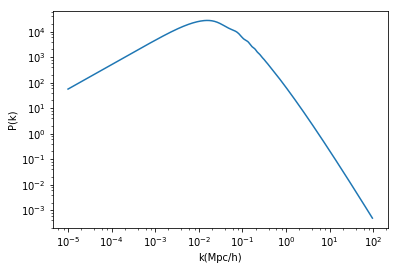

In [24]:
k = 10**np.arange(-5,2,0.02)
Pk = cosmo.matterPowerSpectrum(k)

plt.figure()
plt.loglog()
plt.xlabel('k(Mpc/h)')
plt.ylabel('P(k)')
plt.plot(k, Pk, '-');

Neat! By default, the power spectrum was evaluated using the Eisenstein & Hu transfer function. It's a little hard to discern features with this many orders of magnitures... how about the slope of the power spectrum?

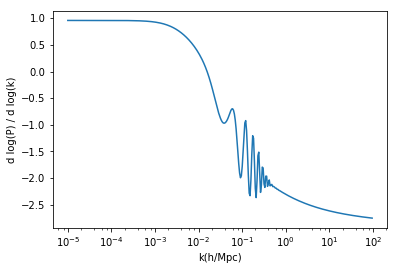

In [25]:
Pk_deriv = cosmo.matterPowerSpectrum(k, derivative = True)

plt.figure()
plt.xscale('log')
plt.xlabel('k(h/Mpc)')
plt.ylabel('d log(P) / d log(k)')
plt.plot(k, Pk_deriv, '-');

Ah, there are those BAO wiggles! How about some integrals? Let's start with the correlation function:

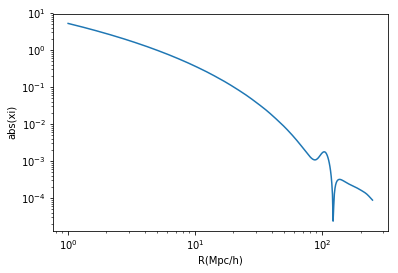

In [28]:
R = 10**np.arange(0,2.4,0.005)
xi = cosmo.correlationFunction(R, 0.0)

# Run this to see what is in a given function
#xi = cosmo.correlationFunction?

plt.figure()
plt.loglog()
plt.xlabel('R(Mpc/h)')
plt.ylabel('abs(xi)')
plt.plot(R, np.abs(xi), '-');

In [ ]:
xi = cosmo.correlationFunction

Or the variance sigma(R):

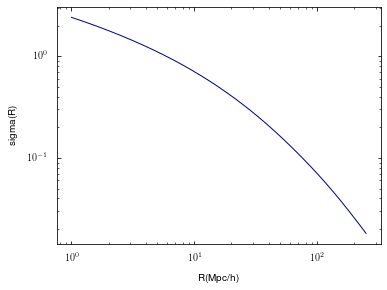

In [21]:
R = 10**np.arange(0,2.4,0.005)
sigma = cosmo.sigma(R, 0.0)

plt.figure()
plt.loglog()
plt.xlabel('R(Mpc/h)')
plt.ylabel('sigma(R)')
plt.plot(R, sigma, '-');

Using the variance, we can conveniently compute quantities such as peak height or their inverses. For example, let's make a plot of the mass that a given peak height corresponds to at different redshifts:

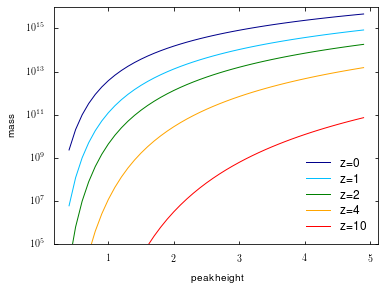

In [22]:
nu = np.arange(0.4, 5.0, 0.1)
z = [0.0, 1.0, 2.0, 4.0, 10.0]

plt.figure()
plt.yscale('log')
plt.xlabel('peak height')
plt.ylabel('mass')
for zz in z:
    M = cosmo.massFromPeakHeight(nu, zz)
    plt.plot(nu, M, '-', label = 'z=%.0f' % zz)
plt.ylim(1E5, 1E16)
plt.legend();

You may notice that the first time you execute functions such as sigma, they take a couple of seconds. That's because Colossus computes an interpolation table, saves it to disk, and loads it the next time the same cosmology is initiated. If, for some reason, this behavior is undesired, you can control it with the storage parameter to the constructor.